In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from micrograd.engine import Value
from micrograd.utils import draw_dot

In [2]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L.backward()
print(L)

Value(data=-8.0, grad=1)


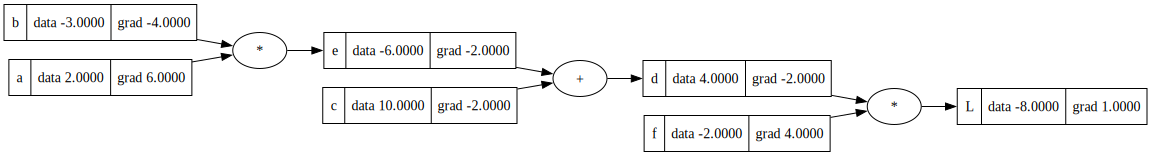

In [3]:
draw_dot(L)

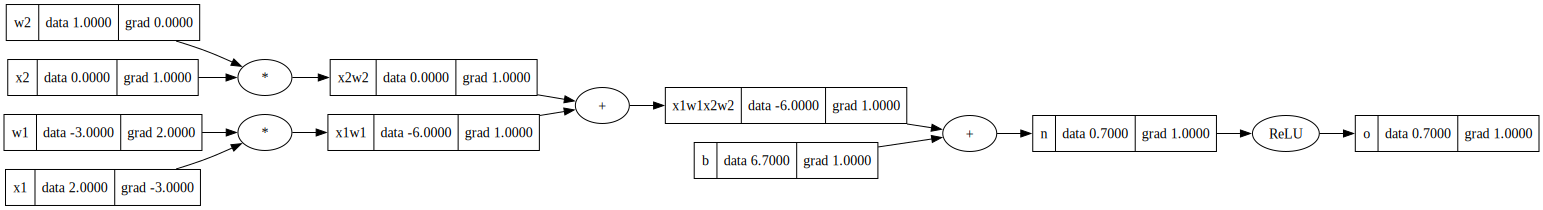

In [6]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.7, label='b')

# x1*w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.relu(); o.label = 'o'
o.backward()
draw_dot(o)